<a href="https://colab.research.google.com/github/aldysptr28/Tugas-1/blob/main/PCD_Aritmatika_%26_logical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# library
import urllib.request
import cv2 # https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get image from link google image

# first Image
urllib.request.urlretrieve(
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMREBITEhEVFhUVFhoSFxUVFxgVGBoaFhYXGxgVGBYYHSggGBolHRcWIjEhJSkrLjAvFyAzODMtNygtLisBCgoKDQ0ODw8NFS0dFRkrLSsrKys3KzctKzcrNysrLS03KysrKystNzctKysrKy03LS03LSstNysrLTcrNy03K//AABEIALEBHAMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EAEMQAAIBAgMEBwUFBgQGAwAAAAECAAMRBBIhBTFBURMiMmFxgZFCUqGxwQYjYnKCFTNTkqLRFCRz8DRDY8LS4XSTsv/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/8QAFhEBAQEAAAAAAAAAAAAAAAAAABEB/9oADAMBAAIRAxEAPwD4bERAREQEREBERAREQEREBERAREm4DZj1bGxC+9bTlpzN9IEKT6WCBUb7sLgjcNOMsKeyqSqCxLDfnOi8LXyk2GvPWx3TTiAQ6hLCnpmsFZVzGxLkEg3AB1O4wKh1sSORtMZ0Q2dSf2bHjkN8uhOtiQN2mutwLDUyBitjOoul3GoNgLi3gTfcfSBWREQEREBERAREQEREBERA9nsxnsDIGeEzy8SQeREShERAREQEREBERAREQEm7P2c1Ug7k1u2nAXIAJGY7vUTVgMMatRU1sSLkcFvqdeQnTFhTXKoChd4DFjqCdVBuSWcjK2/foAYEYbNoIp0zdq5ZrHq3FhqLara+U6nlv34l1RbdlVUi4I0AsEIFyWJIJU3HtEz3ChrXenUF9EvdqtgLEljqSQ5sBYDKTw1sdn4Cm6ZqiqxLMd5ZdOoDr2jZRqeZ5yDkcRtZy11svC+hfzci/kLDul3s2qzLRLVQSbXuASfvGG8kHcANx3cN86ZKajQKB4ACVONrJ0y9W+4Zhk9k3OUE5mtvOXdrv3QORG06l+swcX3OM3oTqPK0usDjRU1F73swYjq3By7xdlvqNQQ1rnUGdWApAtYg+BEiV9l0mzdRQSpUleroRbW2/wA+UChOApOzAoAWOutmBYAgWL2U3Yi3WF1OvKqxuybAPSOdSM3C9gL3A0JFu7gZdqGemCEu9sw0LLuuVQ30HUA0IykjnMMPiSBdgwtcstViCCbFQS2hBK2Dndu5XDk4lnt3ACkwKCyMOdwCCdNdd1jrzlZKEREBERAREQEREBERAREQEREBERAREQEREBERAREQLr7NrYu+ulkA01JuwtfeboNO8TqNjUgEZjl35QRuCoLAXJJ063E7zOY2N1qTKti4Ystxmy3AAbLY3GhF7GxsZZu+ShVSo4zMgWwBXrlm6xuAFXVLncbHnrBY7bclUCqGRicxsXAIBKEgXuua1/CQ9iJVzp11NgxqZdAQwHR9UWDNcHrW3aX0tIqYhqadFg3arvuSmi33kPoB538Z5iA1RFW9OmqAIOiD1nFvZLJp5XgWOG2jV6dzUIFDMyK2gF1OnW79Rc6X3SANnqpDKc4okWqDcMzk6gX6TISWNiN81hgaJBrViigrlASndUsGsNdBcXvNuC2eTSzU+mC7wP8AEKL+AC2HmRAkVaj0qFOlhXFRl6zEWbq6m/IXJ0G+b9ou706LhlyFbvYmxZ0smntrmOq8eRlVs8Kqt0dStTsTpmptdgtzYCwJsIwQZWNRKge5z/fU3RRfUsCLqp13wJ2wukWoAQDmDdI6rYWW2QZgAC183ke6W+NQVKTgWOhsdDYjUehA9JQU8bVTMHGSgxJz0x0uXNvswNgCSTqDa8YHoqdOtTp1bhmRg2uqG11uo6r6OLaHd5Bp2sufDHmpFTTc1yLkXYm16h103HSc1Omr0TTp1mqBBcFaZVchswPVtYXv1dDqNTOZlCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIHoNt0m7Px5QhX61MkBka5W1wbgcDpIMsaezggD4higOoQa1G77HsjvMC6x1LMj0ydL9QkZFN8pXIAbGwuCApJ+WxXqJSyPUCLbTRaHiATd/6AZR1Nrt2aK9GOyLXLkcAXOvkLTEbKqnrVCKYPtVWyk+R6x9JBP6bDopUVBYm7KBVcE/zoD6cJiMfhgCMhsd9qa2PrUkL/DYde1XZu6nT+rkR/lf+v8A0QJ9PFYfrAPkDaMMlRb+OSqR8JNwFXKpWhVBB3KGWpbwSoEYeAJlH0OGbdVqJ+dAw/paP2SW/dVKdTuVrN/I1jAtsNRakaje2bmyAo1rHQU9LdaxvYi3xh7axhpt0dNgDYdI6DIWbXeF0A14SKm0K1LqOCQPYqgkDwvqvlaZnD06+tIlKh16NzcMfwOePc3rKKwsTxnkzq0yrFWBBGhB0MwgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAnqi5sN5nktMP/l6Yqn964+7B9leNQjmeHrAyKrhRqA1ffY6rS8eb/KaMPg3rE1Kj5Vv1qjXNzyUb2buEz2bgek+8qXK5rADtVHPsL9TwkzaO0ejIC5TUUZbjsUh7lMe9zaBvOHampFBVRwM1mIauV4m25PyjWc5UqFjdiSTvJNz6mZq7qRUuwJOYNrqQdSDx1lhXpjEKalMAVQL1KY9rnUQfMQKqJuoYZ37CM35VJ+UlDYmI/gt8IFfEkV8DVTt03XvKkD1kjBYVQvTVuwDZV3Gow4DkvM+W+BPwBqPTHTMjIxtTWsbFueR96+O7hIuO2TbMaebq6tTYWqIOf41/EJCxNd6z3IubaKo0CjgoG4ASZs/adsq1CbL2Kg7dPw95eamB5Qxa1gKdc67krcV5K/vL8RIWLwzUnKOLEehHAg8QZb7U2fnu6gBwM7KvZdf4tPu5jhI2DcV0FBz1h+5Y8/4ZPI8ORgVcT1lIJBFiNCDPICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBM2XhhUfr9hAXc/hHDxJsPObBmxVe5NgdSeCIo+QAmT/d4VR7VZsx/Ihso82ufKTNkYcLSu26pd3PKjS1I/U1h5QMtoYsUkXIMrMuWkP4dI+3/qPvvymn7O7F6ds76Uwf5jyHdzP+xEpq2KxHe7a/hH9gB8J9Bw9BaaKiiwUWAkEbH7Np1aXRkAADqkC2W3Lu7p8/JNKp1HF0OjqdNOIPKX32o20WJo0z1Ro5HE8V8Pn84+xvs61Zc7kopHV01Pfbl84ECrtGvVNs7n8KaD+VZidm1zr0NXxyN/ae16VXC1rXKuuoI4jmOYMsOlSqemNVkA1qUwxzE8Oj7m/plFcmLr0jo9Re4kgeanQzVjMW9Vszm5tYcAAOAA0E34zF1MTUGhPsogubDgBfeeZm+rskWK06geqgu6D45D7RHEQNtcnConRdpwGNYag/gQ8AOPE+E016a10aogC1FF6iDQEfxFHDvHnNOzsWFvTqXNJ+0OKng68mHxior4Wvv6yHfwII5ciDu74EnYuLJK0ibEHNSc+y/un8DbiO+atrYYKRUQZQxIKj2Ki9pO6x1HdNe1KAVg6dioM6d3NfFTcektkP+Ip676oynur0hdW7s66GBXbS+9prXG8nJU/OBo36h8QZWSy2L1meid1Vco7nXVD6i3nK4iB5ERAREQEREBERAREQEREBERAREQEREBETfgFvVpjm6j1YQJe3dKwpj/lqtIeSi/xJlhtc9HSqKOaYYeFNcz+rGQe3jvGv8M/9ps2490pfies/rUI/7YGewcQuHRq7LmuwogDfa2Zz6BZ0e19qquGNWmwOfqoRzP1Av6TksbphsOOfSOf5goPosYrTC0B7zVHPiCqj5GQZfZ/Z3T1gD2V6zeHAeZ+s+gAW3TnfsVRtSqNxZ7eSj/2Z0caIO1tmLiEytoRqrcQfqO6cFisC9Op0bKc17ADW99xXnefS5g1BSysVBZb2JGovvsYHG4rBPg6IIXr1NGqD2AfYXkTxbyEo6VQqwZTYg3BHAifTq1IMpVhcEWIM4Tb2xjh2uLmmToeX4T3wM6u0aQ+9pp98w1uOqjcWUcSd/deVDuSSSSSdSTqTMYlFjR+8wrrxpMKi/lfqsPC+UzZsaqctVRvUCuv5qRB+RM17E1eovvUai/05h8VEfZ//AIhBwYMp80YQG1PusUzLuzCqv6rOPnMNt0wuIqAbicw8HAYfOZ7Y1FA86K/AsPoI21qaJ50aZPkLfSBXREQEREBERAREQEREBERAREQEREBERASTs02rUv8AUX/9CRpkjWII3g39IFlQOXHDur2/rtMtsranR7ulX0qt/ea9sHJimZeLCqP1AN9ZO27Tuj29itnH5K6hgfUWkEDaGtDDH8Lr6Of7xi9cLhyPZaoh8bqw+BntPr4RhxpPn/S4sf6gPWMAOko1aXtC1ZB3qLMPHKb/AKZRZbE2p0GHVrXUVSrgb7MoIYehnW0aquoZTdSLgifPtk1FOek5stUBbngwN0J7r6eclbH2o+EqGnUBy3sy8VPMf71kF/8AbA/5b9a/Izldm7Pq4jN0Z7Nr3a2+9vlOm+1lUNhQykEFlII8DOe2Jtj/AA2fqZs1uNrWv3d8C02VsGvTrU3a2VTc9a/wnUV6KupVhdSLEGUOzftMa1VKfRAZja+a/AndadEIHz/bmyGw780bst/2nv8AnKufUMTQWopRxdToR/vjOB23shsO/ND2W+h74Hmw9KjN7tKo39B/vH2f/wCJp91z6KTGC6lCtU4tagv6jmb4D4z3Ywt0z+5SYD8z9RfPU+ko82t2cOP+iD6sxjbP/I/0E+Nz9Y25++yDXo1SkP0qL/G8beP37LwQLTH6VAPxvAroiICIiAiIgIiICIiAiIgIiICIiAiIgIiIFlj+vQoVPdBot4rqvqp+EsMG4q0kudGX/Cv3MOtRb6eUrtkMGz0GNhVHVJ4OuqHz1HnPNmVQjvSqaI/Ub8JB6reKn6wMMBW6GqQ401p1F7jow8Rv8orI2GrAqeyQ6NwZTuPeCPrJm1cMzhnI+9p2SsBx92qOYItf/wBzDG9TDrSq61L5lHGmp4MeN/d4fCBq2jhgQK1IfdsdQPYbih7uR5T1MUlZQtYkMBZaoF9OCuOI798jYHGtSYkWKkWZDqrDkR9ZLOAStrh2140XNmH5WOjj4wN9bDvTwbhmDL0ilSrZlOjXtym37J4CnW6XpEzZcttSN+a+7wEpK1N0JVgyniDcfCbcFtCpRv0b5c1r6A7r23jvMDuqWycPSIqBApXXMSdPU2lRtr7TAApQNzuL8B+Xme+c3WxNWsQGZ3PAan0EtNm/ZmrUINT7te/tHwHDzkFn9k9qPUvScFgouH5Dkx+Uv8Vh1qIUcXU7/wC45GY4LBpSQIi2HxJ5k8TMNp0HqUnWm2ViLA/TuvuvA4Xa9ZbrSpm9OncA+8xPWb6eAljsykKdNM3/AMqp+RNKa/qbXzldg9nnO3TAqlLWpwPco723D1krbOJIUodHqEVKgHsgfu6XkNfSURtlfeYjO+5Sazn8vW+JsPOQa1QszMd7EsfEm8sG+5w1vbr2Y91NTp/MdfBZWQEREBERAREQEREBERAREQEREBERAREQERED0GWeNXp06de2thWHwFQDkePf4yrm/B4pqThl8CDqCDvUjiDAtNnYtqgUK2Wugy020s6/wmvpflfwlPWLZjmvmub33343vxk7F4QMprUb5PaX2qZ5HmvJpmuJSuAtY5ag0Fa2h5CoOP5vWBVxJGMwT0j110O5hqrDmGGhkeBbDEM+DqZ2LZaiAXN7XDbrzHZbBaNd8iMVNMDOoYDMWvoZGwe0HpAquWzEEhlVtRu3jvmeI2pUdChyAG18qKt7btQIFlsj7RlHtUC5Dp1FC5e8WGo7p2SOGAIIIIuCNQQeM+Wy7+z22zRORzemT/KTxHdzH+zB3MwrVVRSzEADUkyuxW3KanLTvVc7lp6+rbhKLaW0LG9Yq9QarRXWmh5ufabugb9qbTvaqy6DWjTO9j/Gce6OA4ylwNDpGerVJyL1nPFidyD8RM8o0XxDNUqPZRq9Rtw7hzPJRMMfjA1kQFaSdkcSeLtzY/DdKNWNxRquztx3DgANyjuAmiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBuwmKakwZDY7u4jiCOI7pONKlX1QilU40ybIx/Ax7P5TKuIFgmIrYcmmw0406gzKe+x+YmWfDVN6vSPNeunjlNiPIma8PtR1XIbOnuVBmA8OK+RmebDPvWpSP4SKi+NjZviYD9mKexiKRH4iaZ9GEfsepzpnv6Wn/wCUfs5D2MTSP58yH4j6x+yT/Gof/asB+yrdqvRX9eY+igx0eGTe71TyUdGvmza/CP2YB2sRRA7mLH0UR0eGTe9SoeSqKa+BLXPwgeVNpORkpKKanTLTvmbxbtNM12etOzYhsvEUl1qHx9wd59Ji21SoIootIbrrq58XOvpaV7G5ud51gSsbjjUAUAJTXsou4d595u8yJEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQP/9k=', # link from google image
"gambar_1.png")

# Second Image
urllib.request.urlretrieve(
'https://wallpapers.com/images/hd/manchester-united-logo-with-lion-odjbuo2ld2fsre11.jpg', # link from google image
"gambar_2.png")

('gambar_2.png', <http.client.HTTPMessage at 0x7b319ad5e9b0>)

In [3]:
# load image
image_1 = cv2.imread('gambar_1.png',) # cv2.IMREAD_GRAYSCALE
image_2 = cv2.imread('gambar_2.png',)

# Dapatkan resolusi gambar dalam piksel
width, height,channel = image_1.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

# Dapatkan resolusi gambar dalam piksel
width_2, height_2,channel_2 = image_2.shape
print(f"Resolusi gambar 2: {width_2}x{height_2}x{channel_2} piksel")


Resolusi gambar 1: 177x284x3 piksel
Resolusi gambar 2: 1080x1920x3 piksel


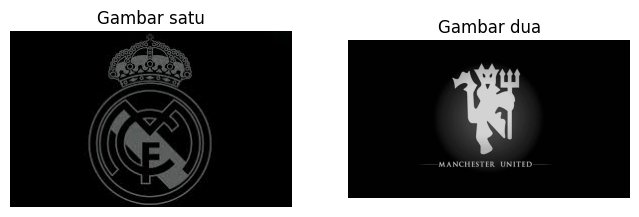

In [4]:
# plot figure
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title("Gambar satu")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title("Gambar dua")
plt.axis('off')

plt.show()

Arithmetic Operations on Images using OpenCV
1. Syntax: cv2.subtract(img1,img2)
2. Syntax: cv2.divide(img1,img2)
3. Syntax: cv2.add(img1,img2)
4. Syntax: cv2.multiply(img1, img2)


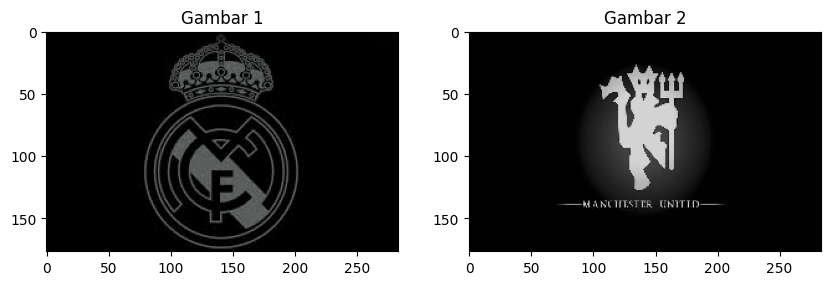

In [5]:
image_1 = cv2.imread('gambar_1.png')
image_2 = cv2.imread('gambar_2.png')

# Dapatkan dimensi gambar yang lebih kecil
min_height = min(image_1.shape[0], image_2.shape[0])
min_width = min(image_1.shape[1], image_2.shape[1])

# Ubah ukuran kedua gambar
image_1 = cv2.resize(image_1, (min_width, min_height))
image_2 = cv2.resize(image_2, (min_width, min_height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # Changed the subplot index to 1
plt.imshow(image_1, cmap='gray')
plt.title('Gambar 1')

plt.subplot(1, 2, 2) # Changed the subplot index to 2
plt.imshow(image_2, cmap='gray')
plt.title('Gambar 2')

plt.show()

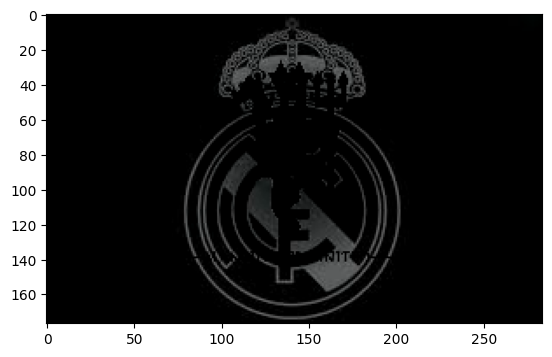

Resolusi gambar 1: 177x284x3 piksel


In [6]:
# hasil gambar Substract
result_subtract = cv2.subtract(image_1, image_2)
plt.imshow(result_subtract)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_subtract.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

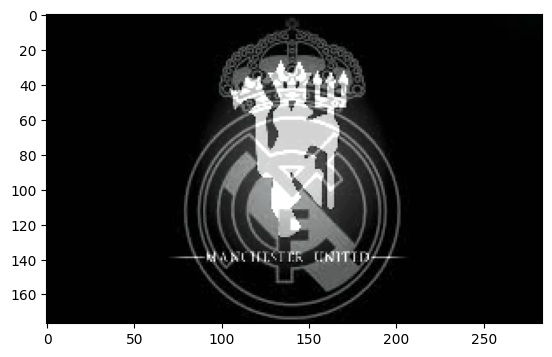

Resolusi gambar 1: 177x284x3 piksel


In [7]:
# hasil gambar Addition
result_add = cv2.add(image_1, image_2)
plt.imshow(result_add)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_add.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

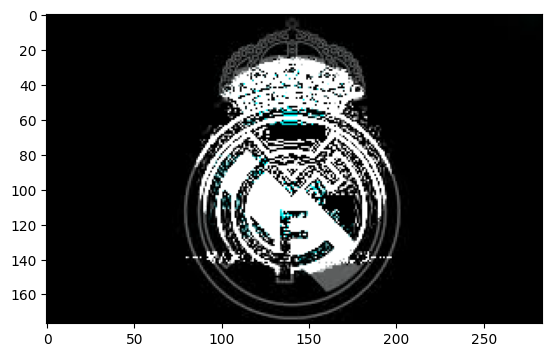

Resolusi gambar 1: 177x284x3 piksel


In [8]:
# hasil gambar Multiply
result_multiply = cv2.multiply(image_1, image_2)
plt.imshow(result_multiply)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_multiply.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

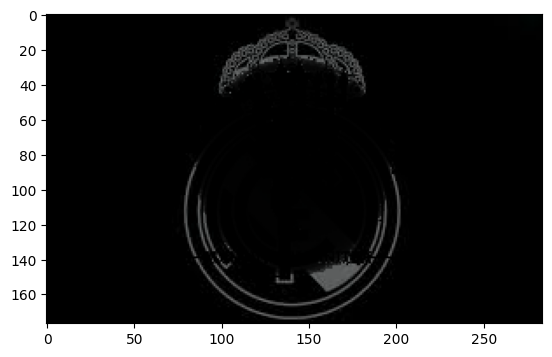

Resolusi gambar 1: 177x284x3 piksel


In [9]:
# hasil gambar Divaninde
result_divide = cv2.divide(image_1, image_2)
plt.imshow(result_divide)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_divide.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

In [10]:
# Membandingkan data piksel
print("Image 1 Shape: ", image_1.shape)
print("Image 2 Shape: ", image_2.shape)
print("Result Image Shape: ", result_add.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
image1_pixels = image_1[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 1 #channel blue
image2_pixels = image_2[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue
image3_pixels = result_add[:5, :5, 0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue

print("\nData Piksel Gambar satu \n", image1_pixels)
print("\nData Piksel Gambar dua \n", image2_pixels)
print("\nData Piksel Gambar tiga \n", image3_pixels)

Image 1 Shape:  (177, 284, 3)
Image 2 Shape:  (177, 284, 3)
Result Image Shape:  (177, 284, 3)

Data Piksel Gambar satu 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Data Piksel Gambar dua 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Data Piksel Gambar tiga 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [11]:
# get image from link google image

# first Image
urllib.request.urlretrieve(
'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMREBITEhEVFhUVFhoSFxUVFxgVGBoaFhYXGxgVGBYYHSggGBolHRcWIjEhJSkrLjAvFyAzODMtNygtLisBCgoKDQ0ODw8NFS0dFRkrLSsrKys3KzctKzcrNysrLS03KysrKystNzctKysrKy03LS03LSstNysrLTcrNy03K//AABEIALEBHAMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAUCAwYBB//EAEMQAAIBAgMEBwUFBgQGAwAAAAECAAMRBBIhBTFBURMiMmFxgZFCUqGxwQYjYnKCFTNTkqLRFCRz8DRDY8LS4XSTsv/EABUBAQEAAAAAAAAAAAAAAAAAAAAB/8QAFhEBAQEAAAAAAAAAAAAAAAAAABEB/9oADAMBAAIRAxEAPwD4bERAREQEREBERAREQEREBERAREm4DZj1bGxC+9bTlpzN9IEKT6WCBUb7sLgjcNOMsKeyqSqCxLDfnOi8LXyk2GvPWx3TTiAQ6hLCnpmsFZVzGxLkEg3AB1O4wKh1sSORtMZ0Q2dSf2bHjkN8uhOtiQN2mutwLDUyBitjOoul3GoNgLi3gTfcfSBWREQEREBERAREQEREBERA9nsxnsDIGeEzy8SQeREShERAREQEREBERAREQEm7P2c1Ug7k1u2nAXIAJGY7vUTVgMMatRU1sSLkcFvqdeQnTFhTXKoChd4DFjqCdVBuSWcjK2/foAYEYbNoIp0zdq5ZrHq3FhqLara+U6nlv34l1RbdlVUi4I0AsEIFyWJIJU3HtEz3ChrXenUF9EvdqtgLEljqSQ5sBYDKTw1sdn4Cm6ZqiqxLMd5ZdOoDr2jZRqeZ5yDkcRtZy11svC+hfzci/kLDul3s2qzLRLVQSbXuASfvGG8kHcANx3cN86ZKajQKB4ACVONrJ0y9W+4Zhk9k3OUE5mtvOXdrv3QORG06l+swcX3OM3oTqPK0usDjRU1F73swYjq3By7xdlvqNQQ1rnUGdWApAtYg+BEiV9l0mzdRQSpUleroRbW2/wA+UChOApOzAoAWOutmBYAgWL2U3Yi3WF1OvKqxuybAPSOdSM3C9gL3A0JFu7gZdqGemCEu9sw0LLuuVQ30HUA0IykjnMMPiSBdgwtcstViCCbFQS2hBK2Dndu5XDk4lnt3ACkwKCyMOdwCCdNdd1jrzlZKEREBERAREQEREBERAREQEREBERAREQEREBERAREQLr7NrYu+ulkA01JuwtfeboNO8TqNjUgEZjl35QRuCoLAXJJ063E7zOY2N1qTKti4Ystxmy3AAbLY3GhF7GxsZZu+ShVSo4zMgWwBXrlm6xuAFXVLncbHnrBY7bclUCqGRicxsXAIBKEgXuua1/CQ9iJVzp11NgxqZdAQwHR9UWDNcHrW3aX0tIqYhqadFg3arvuSmi33kPoB538Z5iA1RFW9OmqAIOiD1nFvZLJp5XgWOG2jV6dzUIFDMyK2gF1OnW79Rc6X3SANnqpDKc4okWqDcMzk6gX6TISWNiN81hgaJBrViigrlASndUsGsNdBcXvNuC2eTSzU+mC7wP8AEKL+AC2HmRAkVaj0qFOlhXFRl6zEWbq6m/IXJ0G+b9ou706LhlyFbvYmxZ0smntrmOq8eRlVs8Kqt0dStTsTpmptdgtzYCwJsIwQZWNRKge5z/fU3RRfUsCLqp13wJ2wukWoAQDmDdI6rYWW2QZgAC183ke6W+NQVKTgWOhsdDYjUehA9JQU8bVTMHGSgxJz0x0uXNvswNgCSTqDa8YHoqdOtTp1bhmRg2uqG11uo6r6OLaHd5Bp2sufDHmpFTTc1yLkXYm16h103HSc1Omr0TTp1mqBBcFaZVchswPVtYXv1dDqNTOZlCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIHoNt0m7Px5QhX61MkBka5W1wbgcDpIMsaezggD4higOoQa1G77HsjvMC6x1LMj0ydL9QkZFN8pXIAbGwuCApJ+WxXqJSyPUCLbTRaHiATd/6AZR1Nrt2aK9GOyLXLkcAXOvkLTEbKqnrVCKYPtVWyk+R6x9JBP6bDopUVBYm7KBVcE/zoD6cJiMfhgCMhsd9qa2PrUkL/DYde1XZu6nT+rkR/lf+v8A0QJ9PFYfrAPkDaMMlRb+OSqR8JNwFXKpWhVBB3KGWpbwSoEYeAJlH0OGbdVqJ+dAw/paP2SW/dVKdTuVrN/I1jAtsNRakaje2bmyAo1rHQU9LdaxvYi3xh7axhpt0dNgDYdI6DIWbXeF0A14SKm0K1LqOCQPYqgkDwvqvlaZnD06+tIlKh16NzcMfwOePc3rKKwsTxnkzq0yrFWBBGhB0MwgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAnqi5sN5nktMP/l6Yqn964+7B9leNQjmeHrAyKrhRqA1ffY6rS8eb/KaMPg3rE1Kj5Vv1qjXNzyUb2buEz2bgek+8qXK5rADtVHPsL9TwkzaO0ejIC5TUUZbjsUh7lMe9zaBvOHampFBVRwM1mIauV4m25PyjWc5UqFjdiSTvJNz6mZq7qRUuwJOYNrqQdSDx1lhXpjEKalMAVQL1KY9rnUQfMQKqJuoYZ37CM35VJ+UlDYmI/gt8IFfEkV8DVTt03XvKkD1kjBYVQvTVuwDZV3Gow4DkvM+W+BPwBqPTHTMjIxtTWsbFueR96+O7hIuO2TbMaebq6tTYWqIOf41/EJCxNd6z3IubaKo0CjgoG4ASZs/adsq1CbL2Kg7dPw95eamB5Qxa1gKdc67krcV5K/vL8RIWLwzUnKOLEehHAg8QZb7U2fnu6gBwM7KvZdf4tPu5jhI2DcV0FBz1h+5Y8/4ZPI8ORgVcT1lIJBFiNCDPICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBM2XhhUfr9hAXc/hHDxJsPObBmxVe5NgdSeCIo+QAmT/d4VR7VZsx/Ihso82ufKTNkYcLSu26pd3PKjS1I/U1h5QMtoYsUkXIMrMuWkP4dI+3/qPvvymn7O7F6ds76Uwf5jyHdzP+xEpq2KxHe7a/hH9gB8J9Bw9BaaKiiwUWAkEbH7Np1aXRkAADqkC2W3Lu7p8/JNKp1HF0OjqdNOIPKX32o20WJo0z1Ro5HE8V8Pn84+xvs61Zc7kopHV01Pfbl84ECrtGvVNs7n8KaD+VZidm1zr0NXxyN/ae16VXC1rXKuuoI4jmOYMsOlSqemNVkA1qUwxzE8Oj7m/plFcmLr0jo9Re4kgeanQzVjMW9Vszm5tYcAAOAA0E34zF1MTUGhPsogubDgBfeeZm+rskWK06geqgu6D45D7RHEQNtcnConRdpwGNYag/gQ8AOPE+E016a10aogC1FF6iDQEfxFHDvHnNOzsWFvTqXNJ+0OKng68mHxior4Wvv6yHfwII5ciDu74EnYuLJK0ibEHNSc+y/un8DbiO+atrYYKRUQZQxIKj2Ki9pO6x1HdNe1KAVg6dioM6d3NfFTcektkP+Ip676oynur0hdW7s66GBXbS+9prXG8nJU/OBo36h8QZWSy2L1meid1Vco7nXVD6i3nK4iB5ERAREQEREBERAREQEREBERAREQEREBETfgFvVpjm6j1YQJe3dKwpj/lqtIeSi/xJlhtc9HSqKOaYYeFNcz+rGQe3jvGv8M/9ps2490pfies/rUI/7YGewcQuHRq7LmuwogDfa2Zz6BZ0e19qquGNWmwOfqoRzP1Av6TksbphsOOfSOf5goPosYrTC0B7zVHPiCqj5GQZfZ/Z3T1gD2V6zeHAeZ+s+gAW3TnfsVRtSqNxZ7eSj/2Z0caIO1tmLiEytoRqrcQfqO6cFisC9Op0bKc17ADW99xXnefS5g1BSysVBZb2JGovvsYHG4rBPg6IIXr1NGqD2AfYXkTxbyEo6VQqwZTYg3BHAifTq1IMpVhcEWIM4Tb2xjh2uLmmToeX4T3wM6u0aQ+9pp98w1uOqjcWUcSd/deVDuSSSSSdSTqTMYlFjR+8wrrxpMKi/lfqsPC+UzZsaqctVRvUCuv5qRB+RM17E1eovvUai/05h8VEfZ//AIhBwYMp80YQG1PusUzLuzCqv6rOPnMNt0wuIqAbicw8HAYfOZ7Y1FA86K/AsPoI21qaJ50aZPkLfSBXREQEREBERAREQEREBERAREQEREBERASTs02rUv8AUX/9CRpkjWII3g39IFlQOXHDur2/rtMtsranR7ulX0qt/ea9sHJimZeLCqP1AN9ZO27Tuj29itnH5K6hgfUWkEDaGtDDH8Lr6Of7xi9cLhyPZaoh8bqw+BntPr4RhxpPn/S4sf6gPWMAOko1aXtC1ZB3qLMPHKb/AKZRZbE2p0GHVrXUVSrgb7MoIYehnW0aquoZTdSLgifPtk1FOek5stUBbngwN0J7r6eclbH2o+EqGnUBy3sy8VPMf71kF/8AbA/5b9a/Izldm7Pq4jN0Z7Nr3a2+9vlOm+1lUNhQykEFlII8DOe2Jtj/AA2fqZs1uNrWv3d8C02VsGvTrU3a2VTc9a/wnUV6KupVhdSLEGUOzftMa1VKfRAZja+a/AndadEIHz/bmyGw780bst/2nv8AnKufUMTQWopRxdToR/vjOB23shsO/ND2W+h74Hmw9KjN7tKo39B/vH2f/wCJp91z6KTGC6lCtU4tagv6jmb4D4z3Ywt0z+5SYD8z9RfPU+ko82t2cOP+iD6sxjbP/I/0E+Nz9Y25++yDXo1SkP0qL/G8beP37LwQLTH6VAPxvAroiICIiAiIgIiICIiAiIgIiICIiAiIgIiIFlj+vQoVPdBot4rqvqp+EsMG4q0kudGX/Cv3MOtRb6eUrtkMGz0GNhVHVJ4OuqHz1HnPNmVQjvSqaI/Ub8JB6reKn6wMMBW6GqQ401p1F7jow8Rv8orI2GrAqeyQ6NwZTuPeCPrJm1cMzhnI+9p2SsBx92qOYItf/wBzDG9TDrSq61L5lHGmp4MeN/d4fCBq2jhgQK1IfdsdQPYbih7uR5T1MUlZQtYkMBZaoF9OCuOI798jYHGtSYkWKkWZDqrDkR9ZLOAStrh2140XNmH5WOjj4wN9bDvTwbhmDL0ilSrZlOjXtym37J4CnW6XpEzZcttSN+a+7wEpK1N0JVgyniDcfCbcFtCpRv0b5c1r6A7r23jvMDuqWycPSIqBApXXMSdPU2lRtr7TAApQNzuL8B+Xme+c3WxNWsQGZ3PAan0EtNm/ZmrUINT7te/tHwHDzkFn9k9qPUvScFgouH5Dkx+Uv8Vh1qIUcXU7/wC45GY4LBpSQIi2HxJ5k8TMNp0HqUnWm2ViLA/TuvuvA4Xa9ZbrSpm9OncA+8xPWb6eAljsykKdNM3/AMqp+RNKa/qbXzldg9nnO3TAqlLWpwPco723D1krbOJIUodHqEVKgHsgfu6XkNfSURtlfeYjO+5Sazn8vW+JsPOQa1QszMd7EsfEm8sG+5w1vbr2Y91NTp/MdfBZWQEREBERAREQEREBERAREQEREBERAREQERED0GWeNXp06de2thWHwFQDkePf4yrm/B4pqThl8CDqCDvUjiDAtNnYtqgUK2Wugy020s6/wmvpflfwlPWLZjmvmub33343vxk7F4QMprUb5PaX2qZ5HmvJpmuJSuAtY5ag0Fa2h5CoOP5vWBVxJGMwT0j110O5hqrDmGGhkeBbDEM+DqZ2LZaiAXN7XDbrzHZbBaNd8iMVNMDOoYDMWvoZGwe0HpAquWzEEhlVtRu3jvmeI2pUdChyAG18qKt7btQIFlsj7RlHtUC5Dp1FC5e8WGo7p2SOGAIIIIuCNQQeM+Wy7+z22zRORzemT/KTxHdzH+zB3MwrVVRSzEADUkyuxW3KanLTvVc7lp6+rbhKLaW0LG9Yq9QarRXWmh5ufabugb9qbTvaqy6DWjTO9j/Gce6OA4ylwNDpGerVJyL1nPFidyD8RM8o0XxDNUqPZRq9Rtw7hzPJRMMfjA1kQFaSdkcSeLtzY/DdKNWNxRquztx3DgANyjuAmiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBuwmKakwZDY7u4jiCOI7pONKlX1QilU40ybIx/Ax7P5TKuIFgmIrYcmmw0406gzKe+x+YmWfDVN6vSPNeunjlNiPIma8PtR1XIbOnuVBmA8OK+RmebDPvWpSP4SKi+NjZviYD9mKexiKRH4iaZ9GEfsepzpnv6Wn/wCUfs5D2MTSP58yH4j6x+yT/Gof/asB+yrdqvRX9eY+igx0eGTe71TyUdGvmza/CP2YB2sRRA7mLH0UR0eGTe9SoeSqKa+BLXPwgeVNpORkpKKanTLTvmbxbtNM12etOzYhsvEUl1qHx9wd59Ji21SoIootIbrrq58XOvpaV7G5ud51gSsbjjUAUAJTXsou4d595u8yJEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQP/9k=', # link from google image
"gambar_1_logical.png")

# Second Image
urllib.request.urlretrieve(
'https://wallpapers.com/images/hd/manchester-united-logo-with-lion-odjbuo2ld2fsre11.jpg', # link from google image
"gambar_2_logical.png")

('gambar_2_logical.png', <http.client.HTTPMessage at 0x7b319a29f820>)

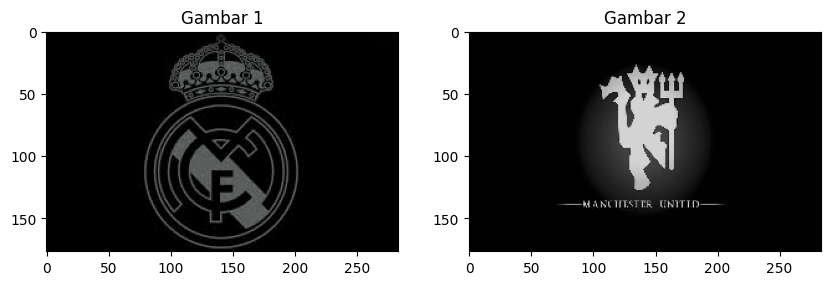

In [12]:
image_1 = cv2.imread('gambar_1.png')
image_2 = cv2.imread('gambar_2.png')

# Dapatkan dimensi gambar yang lebih kecil
min_height = min(image_1.shape[0], image_2.shape[0])
min_width = min(image_1.shape[1], image_2.shape[1])

# Ubah ukuran kedua gambar
image_1 = cv2.resize(image_1, (min_width, min_height))
image_2 = cv2.resize(image_2, (min_width, min_height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # Changed the subplot index to 1
plt.imshow(image_1, cmap='gray')
plt.title('Gambar 1')

plt.subplot(1, 2, 2) # Changed the subplot index to 2
plt.imshow(image_2, cmap='gray')
plt.title('Gambar 2')

plt.show()

In [13]:
# load image
image1_logical = cv2.imread('gambar_1_logical.png')
image2_logical = cv2.imread('gambar_2_logical.png')

image1_logical_not = cv2.imread('gambar_1_logical.png')
image2_logical_not = cv2.imread('gambar_2_logical.png')

image1_logical_xor = cv2.imread('gambar_1_logical.png')
image2_logical_xor = cv2.imread('gambar_2_logical.png')
# Dapatkan resolusi gambar dalam piksel
width, height,channel = image1_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

width, height,channel = image1_logical_not.shape
print(f"Resolusi gambar 1 not: {width}x{height}x{channel} piksel")

width, height,channel = image1_logical_xor.shape
print(f"Resolusi gambar 1 xor: {width}x{height}x{channel} piksel")

# Dapatkan resolusi gambar dalam piksel
width_2, height_2,channel_2 = image1_logical.shape
print(f"Resolusi gambar 2: {width_2}x{height_2}x{channel_2} piksel")

width_2, height_2,channel_2 = image1_logical_not.shape
print(f"Resolusi gambar 2 not: {width_2}x{height_2}x{channel_2} piksel")

width_2, height_2,channel_2 = image1_logical_xor.shape
print(f"Resolusi gambar 2 xor: {width_2}x{height_2}x{channel_2} piksel")



Resolusi gambar 1: 177x284x3 piksel
Resolusi gambar 1 not: 177x284x3 piksel
Resolusi gambar 1 xor: 177x284x3 piksel
Resolusi gambar 2: 177x284x3 piksel
Resolusi gambar 2 not: 177x284x3 piksel
Resolusi gambar 2 xor: 177x284x3 piksel


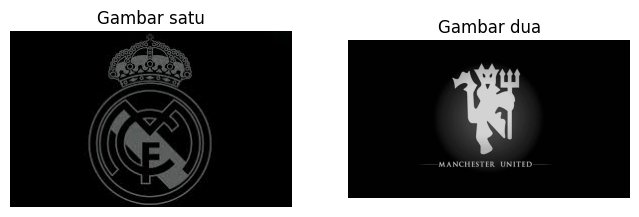

In [14]:
# plot figure
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(image1_logical, cmap='gray')
plt.title("Gambar satu")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_logical, cmap='gray')
plt.title("Gambar dua")
plt.axis('off')

plt.show()

#logical operations
1. result_and = cv2.bitwise_and(img1_gray, img2_gray)
2. result_or = cv2.bitwise_or(img1_gray, img2_gray)
3. result_not = cv2.bitwise_not(img1_gray, img2_gray)
4. result_xor = cv2.bitwise_xor(img1_gray, img2_gray)


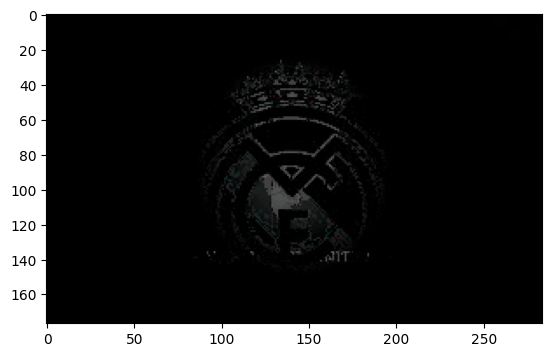

Resolusi gambar 1: 177x284x3 piksel


In [15]:
# hasil gambar gerbang AND
result_logical = cv2.bitwise_and(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

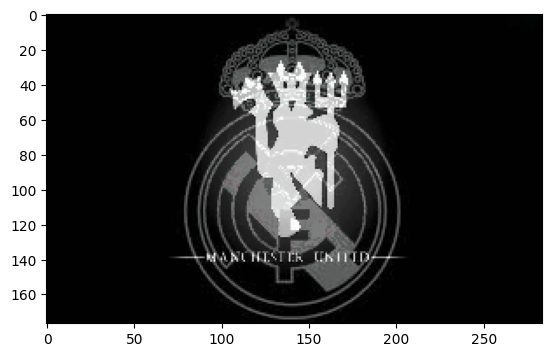

Resolusi gambar 1: 177x284x3 piksel


In [16]:
# hasil gambar gerbang OR
result_logical = cv2.bitwise_or(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

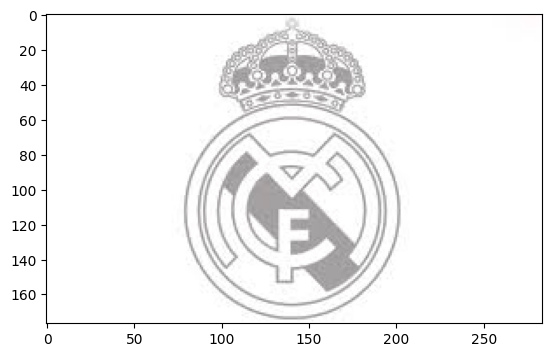

Resolusi gambar 1: 177x284x3 piksel


In [17]:
# hasil gambar gerbang NOT
result_logical = cv2.bitwise_not(image_1) #image1_logical_not
plt.imshow(result_logical)
plt.show()

# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

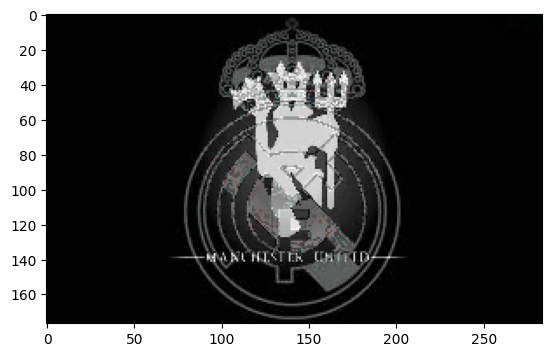

Resolusi gambar 1: 177x284x3 piksel


In [18]:
# hasil gambar XOR
result_logical = cv2.bitwise_xor(image_1, image_2,mask = None)
plt.imshow(result_logical)
plt.show()


# Dapatkan resolusi gambar dalam piksel
width, height,channel = result_logical.shape
print(f"Resolusi gambar 1: {width}x{height}x{channel} piksel")

In [19]:
# Membandingkan data piksel
print("Image 1 Shape: ", image1_logical.shape)
print("Image 2 Shape: ", image2_logical.shape)
print("Result Image Shape: ", result_logical.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
image1_pixels_logical = image1_logical[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 1 #channel blue
image2_pixels_logical = image2_logical[:5,:5,0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue
image3_pixels_logical = result_logical[:5, :5, 0]  # Ambil 5x5 bagian atas dari gambar 2 #channel blue

print("\nData Piksel Gambar satu \n", image1_pixels_logical)
print("\nData Piksel Gambar dua \n", image2_pixels_logical)
print("\nData Piksel Gambar tiga \n", image3_pixels_logical)

Image 1 Shape:  (177, 284, 3)
Image 2 Shape:  (1080, 1920, 3)
Result Image Shape:  (177, 284, 3)

Data Piksel Gambar satu 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Data Piksel Gambar dua 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Data Piksel Gambar tiga 
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
